In [40]:
#linear algebra 
import numpy as np

#data processing 
import pandas as pd

#data visualization 
import seaborn as sns 

#matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Method
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#read pdf
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#info on data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Display of Data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Missing Data
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


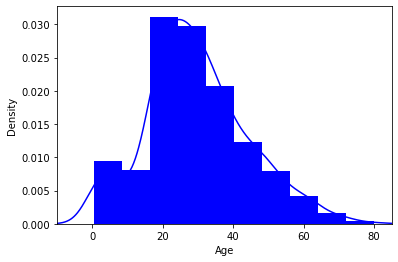

In [6]:
#Distribution of Age 
ax = train_df["Age"].hist(bins=10, density=True, color='blue')
train_df["Age"].plot(kind='density', color='blue')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [7]:
#Clean Data
train_df = train_df.drop(columns = 'Cabin', axis = 1)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True) #Took median cause skewed right 
print(train_df['Embarked'].mode())
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

0    S
dtype: object


In [8]:
#Combine SibSp and Parch
train_df['Alone'] = np.where((train_df["SibSp"] + train_df["Parch"]) > 0, 0, 1)
train_df.drop('SibSp', axis = 1, inplace = True)
train_df.drop('Parch', axis = 1, inplace = True)

In [9]:
#Data Summary
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [10]:
#Check for missing data
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Alone          0
dtype: int64

In [11]:
#Test Data Summary
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0


In [12]:
#Clean Data
test_df = test_df.drop(columns = 'Cabin', axis = 1)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True) #Took median cause skewed right 
test_df["Fare"].fillna(test_df["Fare"].median(skipna=True), inplace=True)

In [13]:
#Combine SibSp and Parch
test_df['Alone'] = np.where((test_df["SibSp"] + test_df["Parch"]) > 0, 0, 1) #1 means travel alone
test_df.drop('SibSp', axis = 1, inplace = True)
test_df.drop('Parch', axis = 1, inplace = True)

In [14]:
#Check for missing data
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Alone          0
dtype: int64

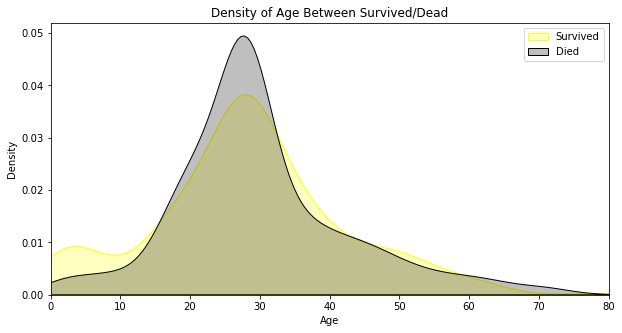

In [15]:
#Age
plt.figure(figsize = (10,5))
ax = sns.kdeplot(train_df["Age"][train_df.Survived == 1], color="yellow", shade = True)
sns.kdeplot(train_df["Age"][train_df.Survived == 0], color="black", shade = True)
plt.legend(['Survived', 'Died'])
plt.title('Density of Age Between Survived/Dead')
ax.set(xlabel = 'Age')
plt.xlim(0,80)
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

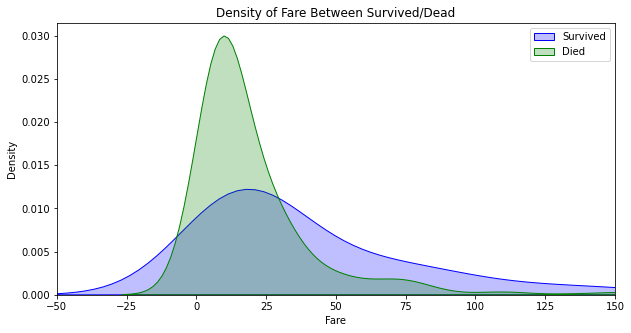

In [16]:
#Fare
plt.figure(figsize = (10,5))
ax = sns.kdeplot(train_df["Fare"][train_df.Survived == 1], color = "blue", shade=True)
sns.kdeplot(train_df["Fare"][train_df.Survived == 0], color = "green", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density of Fare Between Survived/Dead')
ax.set(xlabel = 'Fare')
plt.xlim(-50,150)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

Text(0.5, 0.98, 'Pclass Survivors')

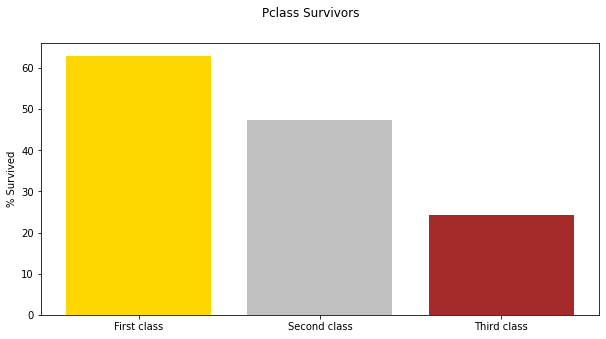

In [17]:
#Pclass
fig, ax = plt.subplots(figsize = (10,5))
pclass_count = train_df['Pclass'].value_counts(sort = False)
s_count = train_df.loc[train_df['Survived'] == 1, ['Pclass']].value_counts(sort = False)
ax.bar('First class', s_count.iloc[0]/pclass_count.iloc[0] * 100, color = 'gold')
ax.bar('Second class', s_count.iloc[1]/pclass_count.iloc[1] * 100, color = 'silver')
ax.bar('Third class', s_count.iloc[2]/pclass_count.iloc[2] * 100, color = 'brown')
ax.set_ylabel('% Survived')
plt.suptitle('Pclass Survivors')

Being a first class passenger was safest.

Text(0.5, 0.98, 'Embarked Survivors')

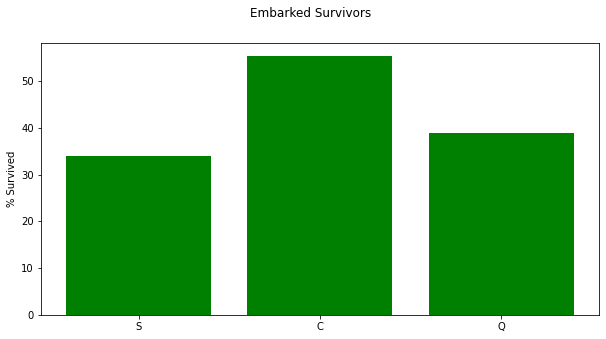

In [18]:
#Embarked
fig, ax = plt.subplots(figsize = (10,5))
embarked_count = train_df['Embarked'].value_counts(sort = False)
s_count = train_df.loc[train_df['Survived'] == 1, ['Embarked']].value_counts(sort = False)
ns_count = train_df.loc[train_df['Survived'] == 0, ['Embarked']].value_counts(sort = False)
ax.bar('S', s_count['S']/embarked_count['S'] * 100, color='green')
ax.bar('C', s_count['C']/embarked_count['C'] * 100, color='green')
ax.bar('Q', s_count['Q']/embarked_count['Q'] * 100, color='green')
ax.set_ylabel('% Survived')
plt.suptitle('Embarked Survivors')

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

Text(0.5, 0.98, 'Male vs Female Survivors')

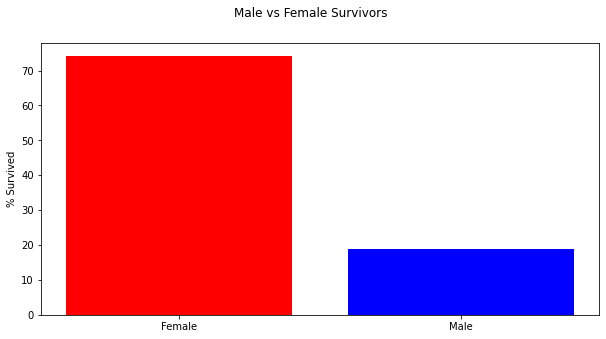

In [19]:
#Sex
fig, ax = plt.subplots(figsize = (10,5))
gender_count = train_df['Sex'].value_counts(sort = False)
s_count = train_df.loc[train_df['Survived'] == 1, ['Sex']].value_counts(sort = False)
ax.bar('Female', s_count['female']/gender_count['female'] * 100, color = 'red')
ax.bar('Male', s_count['male']/gender_count['male'] * 100, color = 'blue')
ax.set_ylabel('% Survived')
plt.suptitle('Male vs Female Survivors')

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

C:\Users\james\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


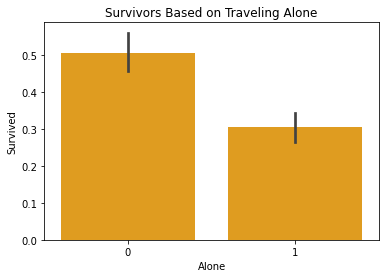

In [20]:
#Alone
sns.barplot('Alone', 'Survived', data = train_df, color = "orange")
plt.title('Survivors Based on Traveling Alone')
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

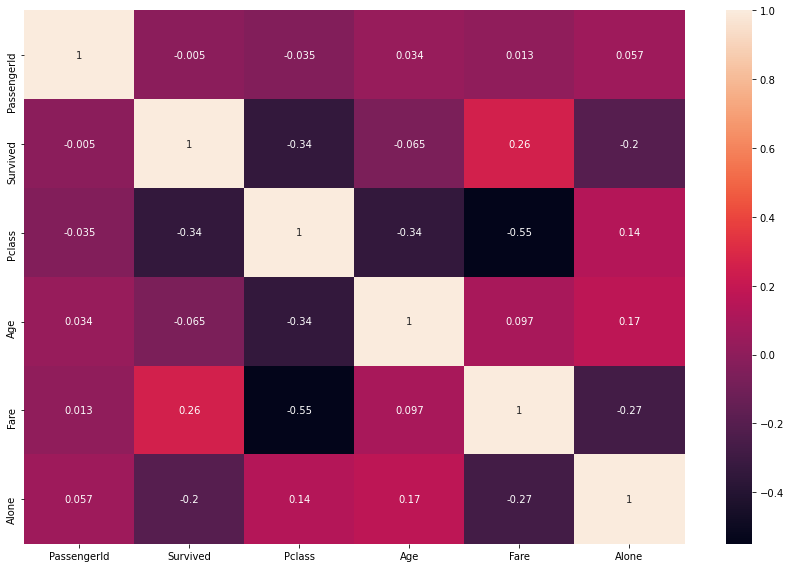

In [21]:
#Correlation
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True)
plt.tight_layout()

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry.

In [22]:
#Making Sex Categorical
categories = {"female": 1, "male": 0}
train_df['Sex']= train_df['Sex'].map(categories)
test_df['Sex']= test_df['Sex'].map(categories)

In [23]:
#Making Embarked Categorical
categories = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked']= train_df['Embarked'].map(categories)
test_df['Embarked']= test_df['Embarked'].map(categories)

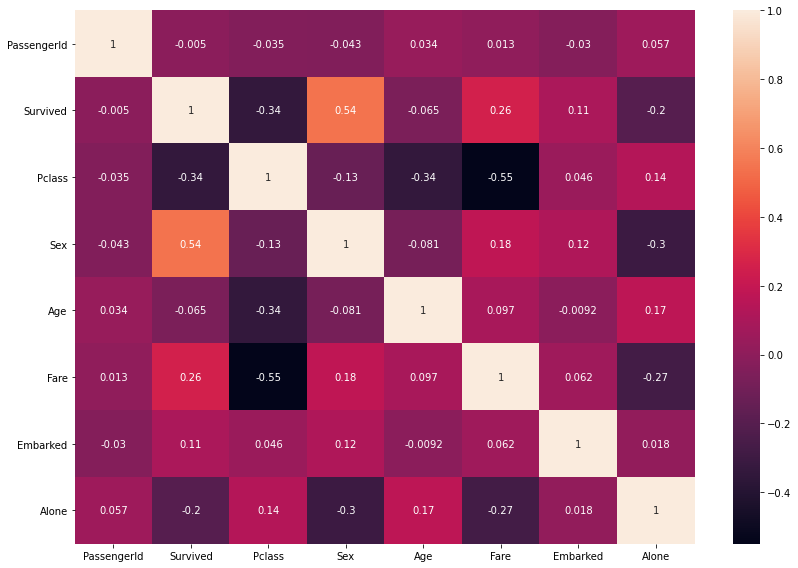

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True)
plt.tight_layout()

In [28]:
train_new = train_df.drop(['Name','Ticket','PassengerId'], axis=1)
test_new = test_df.drop(['Name','Ticket','PassengerId'], axis=1)
train_new.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,2,0
2,1,3,1,26.0,7.9250,1,1
3,1,1,1,35.0,53.1000,1,0
4,0,3,0,35.0,8.0500,1,1


In [29]:
LABEL = 'Survived'
y = train_new[LABEL]
train_new = train_new.drop(LABEL, axis=1)

In [30]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_new)
scaled_test = scaler.transform(test_new)

scaled_train = pd.DataFrame(scaled_train, columns=train_new.columns, index=train_new.index)
scaled_test = pd.DataFrame(scaled_test, columns=test_new.columns, index=test_new.index)

In [31]:
scaled_train.head()

,Pclass,Sex,Age,Fare,Embarked,Alone
0,1.0,0.0,0.271174,0.014151,0.0,0.0
1,0.0,1.0,0.472229,0.139136,0.5,0.0
2,1.0,1.0,0.321438,0.015469,0.0,1.0
3,0.0,1.0,0.434531,0.103644,0.0,0.0
4,1.0,0.0,0.434531,0.015713,0.0,1.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 6) (179, 6)
(712,) (179,)


In [33]:
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

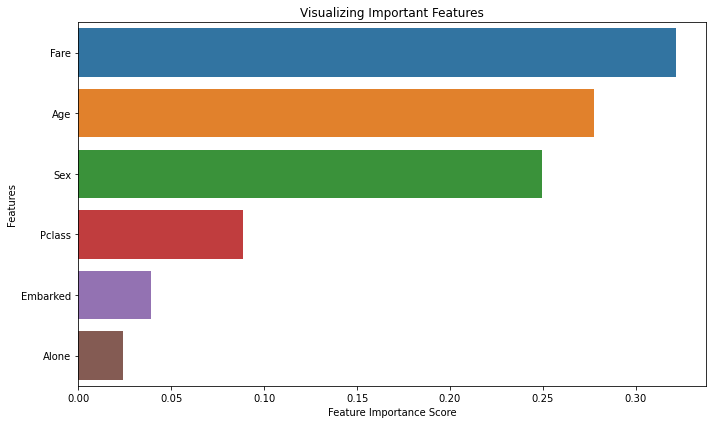

In [34]:
feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [37]:
y_pred = clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.776536312849162


In [41]:
# Removing less important features
new_train = scaled_train.drop(['Alone','Embarked'], axis=1)
new_test = scaled_test.drop(['Alone','Embarked'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

   Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.72      0.76      0.74        70

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



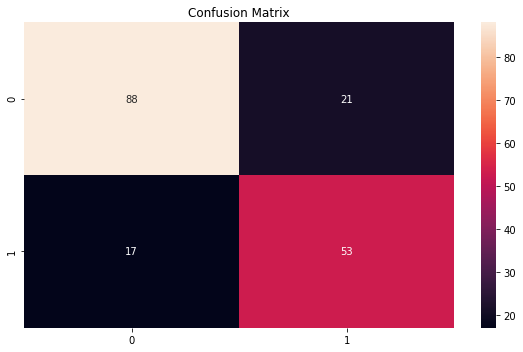

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [44]:
prediction = clf.predict(new_test)

test_new['Survival_Predictions'] = pd.Series(prediction)
test_new.head()

,Pclass,Sex,Age,Fare,Embarked,Alone,Survival_Predictions
0,3,0,34.5,7.8292,3,1,0
1,3,1,47.0,7.0000,1,0,0
2,2,0,62.0,9.6875,3,1,1
3,3,0,27.0,8.6625,1,1,1
4,3,1,22.0,12.2875,1,0,0


In [53]:
train_x = train_df.drop(["PassengerId","Ticket","Name"], axis = 1, inplace = True)

In [60]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,2,0
2,1,3,1,26.0,7.9250,1,1
3,1,1,1,35.0,53.1000,1,0
4,0,3,0,35.0,8.0500,1,1


In [62]:
x = train_df.drop("Survived", axis = 1)
Y = train_df['Survived']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.30, random_state = 50)

In [63]:
model = LogisticRegression()
model.fit(x_train,Y_train)

LogisticRegression()

In [64]:
pred = model.predict(x_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [65]:
x_test.head(1)

,Pclass,Sex,Age,Fare,Embarked,Alone
558,1,1,39.0,79.65,1,0


In [66]:
#Train Data
print(model.score(x_train,Y_train))
pp = model.predict(x_train)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.7881219903691814
Survived 222
NOT Survived 401


In [67]:
#Test Data
print(model.score(x_test,Y_test))
pp = model.predict(x_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.8059701492537313
Survived 94
NOT Survived 174


array([[142,  20],
       [ 32,  74]], dtype=int64)

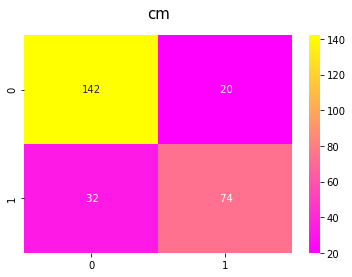

In [68]:
cm = confusion_matrix(Y_test,pp)
sns.heatmap(confusion_matrix(Y_test,pp),annot=True,fmt='3.0f',cmap="spring")
plt.title('cm', y=1.05, size=15)
cm

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [69]:
prediction_lr=model.predict(x_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,Y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 80.6


In [73]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_test})
submission['Survived'] = submission['Survived'].fillna(0)
submission['PassengerId'] = submission['PassengerId'].fillna(0)
submission

,PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,1.0
3,895.0,0.0
4,896.0,0.0
...,...,...
876,0.0,0.0
881,0.0,0.0
882,0.0,0.0
884,0.0,0.0


In [65]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [66]:
lr_score = classifier.score(X_test, Y_test)
accuracies.append(lr_score)
print(lr_score)

0.8156424581005587


In [60]:
rdmf = RandomForestClassifier(n_estimators=20, criterion='entropy')
rdmf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [61]:
rdmf_score = rdmf.score(X_test, Y_test)
rdmf_score_tr = rdmf.score(X_train, Y_train)
accuracies.append(rdmf_score)
print(rdmf_score)
print(rdmf_score_tr)

0.8268156424581006
0.973314606741573


In [69]:
knn = KNeighborsClassifier(p=2, n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [70]:
knn_score = knn.score(X_test, Y_test)
accuracies.append(knn_score)
print(knn_score)

0.7430167597765364


In [75]:
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [77]:
svm_score = svm.score(X_test, Y_test)
accuracies.append(svm_score)
print(svm_score)

0.8212290502793296


In [79]:
k_svm = SVC(kernel='rbf')
k_svm.fit(X_train, Y_train)

SVC()

In [81]:
k_svm_score = k_svm.score(X_test, Y_test)
accuracies.append(k_svm_score)
print(k_svm_score)

0.7206703910614525
